#####improving our model
#1.add more layers 2.change activation function 3. change optimizer 4. change learning rate  
#may we can add more hidden units


In [2]:
from sklearn.datasets import make_circles
samples = 1000
x,y = make_circles(n_samples=samples, noise=0.03, random_state=42)#features and labels
len(x), len(y)

(1000, 1000)

In [3]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame({"x1":x[:,0], "x2":x[:,1], "label":y})
df

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [4]:
x= torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
x,y#


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [7]:
class circlemodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))
model = circlemodel()
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [8]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.4285,  0.2201],
                      [ 0.5838,  0.0653],
                      [ 0.4046,  0.4508],
                      [ 0.2206,  0.3924],
                      [ 0.4331, -0.4780],
                      [-0.3615,  0.5005],
                      [-0.4499,  0.4508],
                      [-0.3260, -0.0237],
                      [-0.6355,  0.6103],
                      [-0.0007, -0.6582]])),
             ('layer1.bias',
              tensor([ 0.3615, -0.4347,  0.1564,  0.1485, -0.0172, -0.2923,  0.2765,  0.0109,
                      -0.4086, -0.2679])),
             ('layer2.weight',
              tensor([[ 0.0796, -0.1302, -0.0353, -0.0824, -0.0732,  0.0313,  0.0165, -0.2081,
                       -0.0568, -0.0266],
                      [ 0.1667, -0.3088, -0.1761, -0.1114,  0.2978,  0.1344, -0.1359,  0.2075,
                        0.1917, -0.0904],
                      [-0.0435, -0.0972,  0.1640, -0.3108,  0.1735,  0.1429

In [9]:
#to find the loss and optimizer
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [13]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

epochs = 1000

for epoch in range(epochs):
    model.train()
    y_logits = model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    train_loss = loss(y_logits, y_train)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        y_logits = model(x_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))
        test_loss = loss(y_logits, y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Accuracy: {torch.eq(y_pred, y_test).sum()/len(y_pred):.2f}")

Epoch: 0 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 100 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 200 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 300 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 400 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 500 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 600 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 700 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 800 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46
Epoch: 900 | Train loss: 0.69298 | Test loss: 0.69468 | Accuracy: 0.46


In [14]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as file:
        file.write(response.content)
from helper_functions import plot_decision_boundary, plot_predictions

helper_functions.py already exists, skipping download.


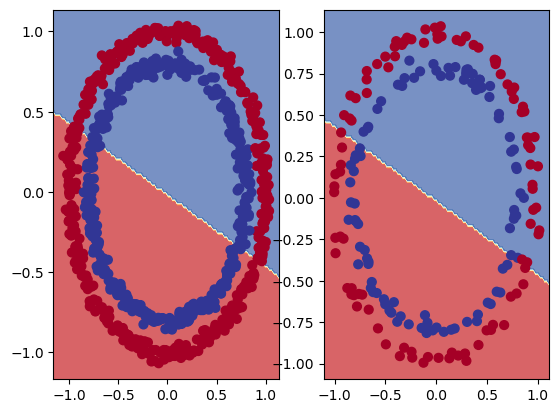

In [16]:
plt.subplot(1, 2, 1)
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model, x_test, y_test)

In [31]:
#check our model can fit a straight line or not
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

x1 = torch.arange(start, end, step).unsqueeze(dim=1)
y1 = weight * x1 + bias

print(len(x1), len(y))

100 100


In [35]:
train_split = int(0.8 * len(x1))
xtrain,ytrain = x1[:train_split], y1[:train_split]
xtest,ytest = x1[train_split:], y1[train_split:]
len(xtrain), len(xtest), len(ytrain), len(ytest)

(80, 20, 80, 20)

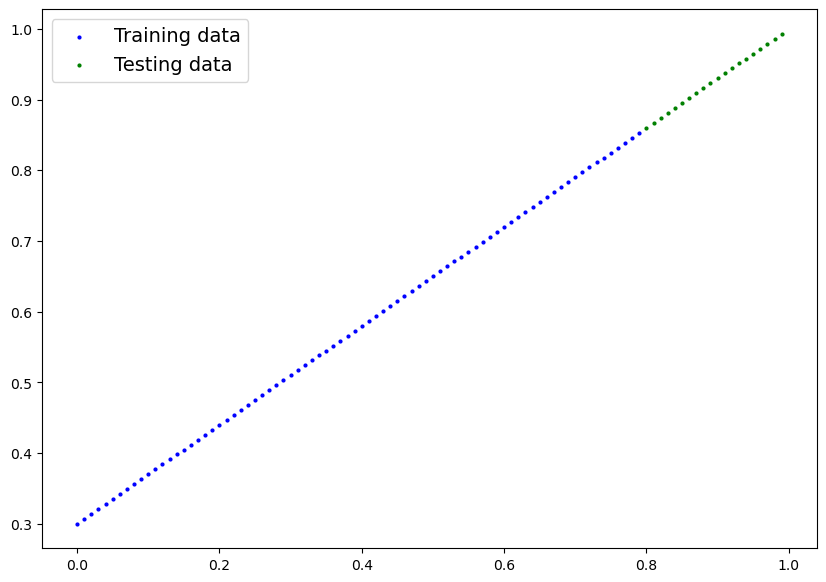

In [36]:
plot_predictions(xtrain, ytrain, xtest, ytest)

In [37]:
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
xtrain,ytrain#you see here that we have working with 2D data, so we need to change the model to work with 1D data so we create a new model

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [39]:
model1 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
)
model1

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [51]:
#loss and optimizer
loss1 = nn.L1Loss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)

In [52]:
#train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs1 = 1000

for epoch in range(epochs1):
    model1.train()
    train_pred = model1(xtrain)
    
    train_loss1 = loss1(train_pred, ytrain)
    
    optimizer1.zero_grad()
    train_loss1.backward()
    optimizer1.step()
    
    model1.eval()
    with torch.inference_mode():
        test_pred = model1(xtest)
        test_loss1 = loss1(test_pred, ytest)
    
    if epoch % 100 == 0:
       print(f"Epoch: {epoch} | Train loss: {train_loss1:.5f} | Test loss: {test_loss1:.5f} | Accuracy: {torch.eq(test_pred, ytest).sum()/len(test_pred):.2f}")

Epoch: 0 | Train loss: 0.21742 | Test loss: 0.15940 | Accuracy: 0.00
Epoch: 100 | Train loss: 0.05028 | Test loss: 0.12086 | Accuracy: 0.00
Epoch: 200 | Train loss: 0.05430 | Test loss: 0.11527 | Accuracy: 0.00
Epoch: 300 | Train loss: 0.04883 | Test loss: 0.12532 | Accuracy: 0.00
Epoch: 400 | Train loss: 0.05485 | Test loss: 0.11507 | Accuracy: 0.00
Epoch: 500 | Train loss: 0.05986 | Test loss: 0.11699 | Accuracy: 0.00
Epoch: 600 | Train loss: 0.04860 | Test loss: 0.11942 | Accuracy: 0.00
Epoch: 700 | Train loss: 0.04554 | Test loss: 0.11136 | Accuracy: 0.00
Epoch: 800 | Train loss: 0.05100 | Test loss: 0.12237 | Accuracy: 0.00
Epoch: 900 | Train loss: 0.05330 | Test loss: 0.10569 | Accuracy: 0.00


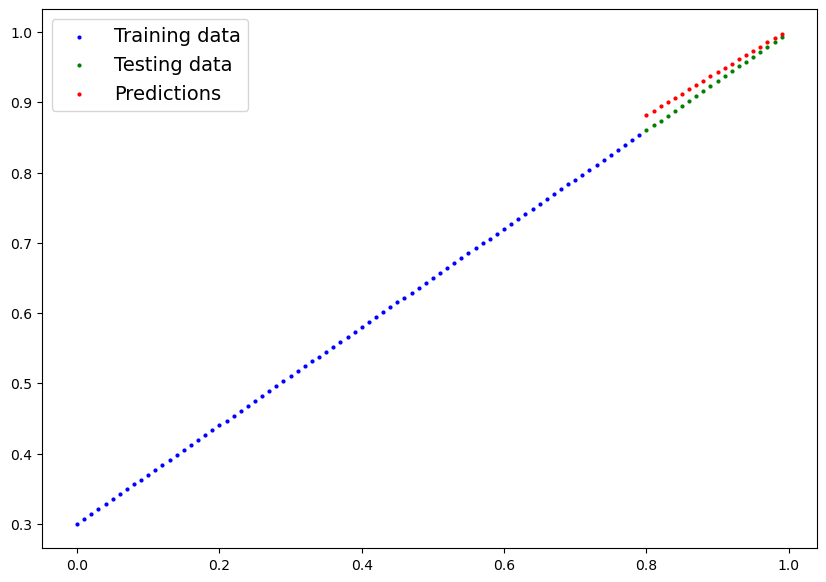

In [67]:
model1.eval()
with torch.inference_mode():
    preds = model1(xtest)
    preds = preds.squeeze()
    plot_predictions(train_data=xtrain, train_labels=ytrain,test_data= xtest, test_labels=ytest, predictions=preds)

In [66]:
xtest,preds

(tensor([[0.8000],
         [0.8100],
         [0.8200],
         [0.8300],
         [0.8400],
         [0.8500],
         [0.8600],
         [0.8700],
         [0.8800],
         [0.8900],
         [0.9000],
         [0.9100],
         [0.9200],
         [0.9300],
         [0.9400],
         [0.9500],
         [0.9600],
         [0.9700],
         [0.9800],
         [0.9900]]),
 tensor([0.3961, 0.4021, 0.4082, 0.4143, 0.4204, 0.4264, 0.4325, 0.4386, 0.4447,
         0.4507, 0.4568, 0.4629, 0.4690, 0.4750, 0.4811, 0.4872, 0.4933, 0.4993,
         0.5054, 0.5115, 0.5176, 0.5236, 0.5297, 0.5358, 0.5419, 0.5479, 0.5540,
         0.5601, 0.5662, 0.5722, 0.5783, 0.5844, 0.5905, 0.5965, 0.6026, 0.6087,
         0.6148, 0.6208, 0.6269, 0.6330, 0.6391, 0.6451, 0.6512, 0.6573, 0.6634,
         0.6694, 0.6755, 0.6816, 0.6877, 0.6937, 0.6998, 0.7059, 0.7120, 0.7180,
         0.7241, 0.7302, 0.7363, 0.7423, 0.7484, 0.7545, 0.7606, 0.7666, 0.7727,
         0.7788, 0.7849, 0.7909, 0.7970, 0.8031, 0.